In [3]:
# --- 0) Imports & settings ---
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_colwidth", 120)
pd.set_option("display.width", 120)

# Optional: show all warnings? usually no.
import warnings
warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.


In [ ]:
# --- 1) Load CSV ---
csv_path = "actions.csv"  # <-- change this

df_actions = pd.read_csv(csv_path)
df_actions.head()

,week,week_start,action_type,origin,destination,product,qty
0,0,2023-01-02,replenishment_order,F1,DC_W,P1,321
1,0,2023-01-02,replenishment_order,F1,DC_W,P2,100
2,0,2023-01-02,replenishment_order,F1,DC_W,P3,288
3,0,2023-01-02,replenishment_order,F1,DC_W,P4,276
4,0,2023-01-02,replenishment_order,F1,DC_W,P5,261


In [8]:
# --- 2) Basic shape / columns ---
print("Shape (rows, cols):", df_actions.shape)
print("\nColumns:")
display(df_actions.columns.to_frame(index=False).rename(columns={0: "column"}))

# quick peek at tail too
df_actions.tail()

Shape (rows, cols): (2340, 7)

Columns:


,column
0,week
1,week_start
2,action_type
3,origin
4,destination
5,product
6,qty


,week,week_start,action_type,origin,destination,product,qty
2335,155,2025-12-22,replenishment_order,F1,DC_E,P1,121
2336,155,2025-12-22,replenishment_order,F1,DC_E,P2,381
2337,155,2025-12-22,replenishment_order,F1,DC_E,P3,237
2338,155,2025-12-22,replenishment_order,F1,DC_E,P4,381
2339,155,2025-12-22,replenishment_order,F1,DC_E,P5,132


In [9]:
# --- 3) Data types & memory ---
display(df_actions.dtypes.to_frame("dtype"))

# Info (includes non-null counts)
df_actions.info()

# Memory usage
mem_mb = df_actions.memory_usage(deep=True).sum() / (1024**2)
print(f"\nTotal memory: {mem_mb:.2f} MB")

,dtype
week,int64
week_start,object
action_type,object
origin,object
destination,object
product,object
qty,int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   week         2340 non-null   int64 
 1   week_start   2340 non-null   object
 2   action_type  2340 non-null   object
 3   origin       2340 non-null   object
 4   destination  2340 non-null   object
 5   product      2340 non-null   object
 6   qty          2340 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 128.1+ KB

Total memory: 0.75 MB


In [10]:
# --- 4) Missing values ---
missing = (
    df_actions.isna()
      .sum()
      .to_frame("missing_count")
      .assign(missing_pct=lambda x: (x["missing_count"] / len(df_actions) * 100).round(2))
      .sort_values("missing_count", ascending=False)
)
display(missing)

# Show only columns with missing
display(missing[missing["missing_count"] > 0])

,missing_count,missing_pct
week,0,0.0
week_start,0,0.0
action_type,0,0.0
origin,0,0.0
destination,0,0.0
product,0,0.0
qty,0,0.0


,missing_count,missing_pct


In [11]:
# --- 5) Duplicates ---
dup_rows = df_actions.duplicated().sum()
print("Duplicate rows:", dup_rows)

# If you want to inspect them:
# df[df.duplicated(keep=False)].sort_values(list(df.columns)).head(20)

Duplicate rows: 0


In [12]:
# --- 6) Summary stats (numeric + all) ---
display(df_actions.describe())              # numeric columns
display(df_actions.describe(include="all")) # all columns (can be heavy)

,week,qty
count,2340.000000,2340.000000
mean,77.500000,250.334615
std,45.042021,86.066359
min,0.000000,100.000000
25%,38.750000,176.000000
50%,77.500000,250.000000
75%,116.250000,322.000000
max,155.000000,399.000000


,week,week_start,action_type,origin,destination,product,qty
count,2340.000000,2340,2340,2340,2340,2340,2340.000000
unique,NaN,156,1,1,3,5,NaN
top,NaN,2023-01-02,replenishment_order,F1,DC_W,P1,NaN
freq,NaN,15,2340,2340,780,468,NaN
mean,77.500000,NaN,NaN,NaN,NaN,NaN,250.334615
std,45.042021,NaN,NaN,NaN,NaN,NaN,86.066359
min,0.000000,NaN,NaN,NaN,NaN,NaN,100.000000
25%,38.750000,NaN,NaN,NaN,NaN,NaN,176.000000
50%,77.500000,NaN,NaN,NaN,NaN,NaN,250.000000
75%,116.250000,NaN,NaN,NaN,NaN,NaN,322.000000


In [13]:
# --- 7) Unique values per column (and top categories for object columns) ---
nunique = df_actions.nunique(dropna=False).sort_values(ascending=False).to_frame("nunique")
display(nunique)

# Top values for categorical-ish columns
cat_cols = df_actions.select_dtypes(include=["object", "category"]).columns
for c in cat_cols:
    print(f"\n--- {c} (top 10) ---")
    display(df_actions[c].value_counts(dropna=False).head(10))

,nunique
qty,299
week,156
week_start,156
product,5
destination,3
action_type,1
origin,1



--- week_start (top 10) ---


week_start
2023-01-02    15
2025-01-20    15
2024-12-02    15
2024-12-09    15
2024-12-16    15
2024-12-23    15
2024-12-30    15
2025-01-06    15
2025-01-13    15
2025-01-27    15
Name: count, dtype: int64


--- action_type (top 10) ---


action_type
replenishment_order    2340
Name: count, dtype: int64


--- origin (top 10) ---


origin
F1    2340
Name: count, dtype: int64


--- destination (top 10) ---


destination
DC_W    780
DC_C    780
DC_E    780
Name: count, dtype: int64


--- product (top 10) ---


product
P1    468
P2    468
P3    468
P4    468
P5    468
Name: count, dtype: int64

In [14]:
# --- 8) Identify likely numeric columns stored as text ---
# (common when commas, dollar signs, etc. exist)
maybe_numeric = []
for c in df_actions.select_dtypes(include=["object"]).columns:
    sample = df_actions[c].dropna().astype(str).head(200)
    # heuristic: if many values look numeric after stripping commas/$
    cleaned = sample.str.replace(r"[\$,]", "", regex=True)
    coerced = pd.to_numeric(cleaned, errors="coerce")
    ratio = coerced.notna().mean() if len(cleaned) else 0
    if ratio > 0.9 and len(sample) > 0:
        maybe_numeric.append((c, ratio))
maybe_numeric

[]

Numeric columns: 2


,week,qty
week,1.000000,-0.003559
qty,-0.003559,1.000000


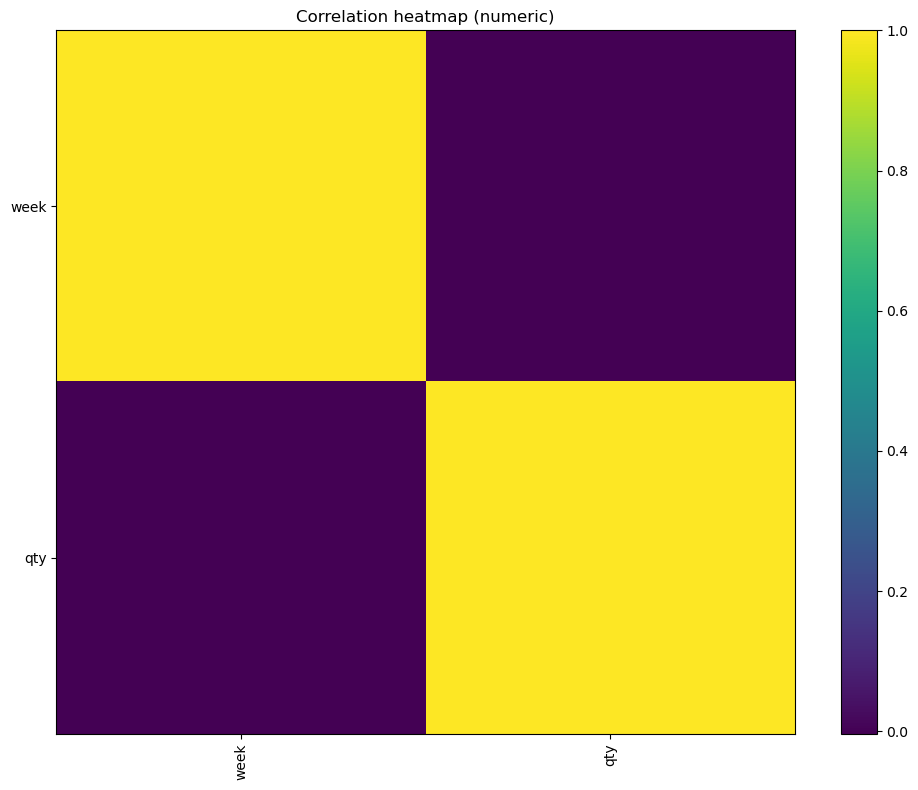

In [15]:
# --- 9) Correlation (numeric) ---
num_df = df_actions.select_dtypes(include=[np.number])

print("Numeric columns:", len(num_df.columns))
if len(num_df.columns) > 1:
    corr = num_df.corr(numeric_only=True)
    display(corr)

    # Quick heatmap (matplotlib only)
    plt.figure(figsize=(10, 8))
    plt.imshow(corr, aspect="auto")
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title("Correlation heatmap (numeric)")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for correlation.")

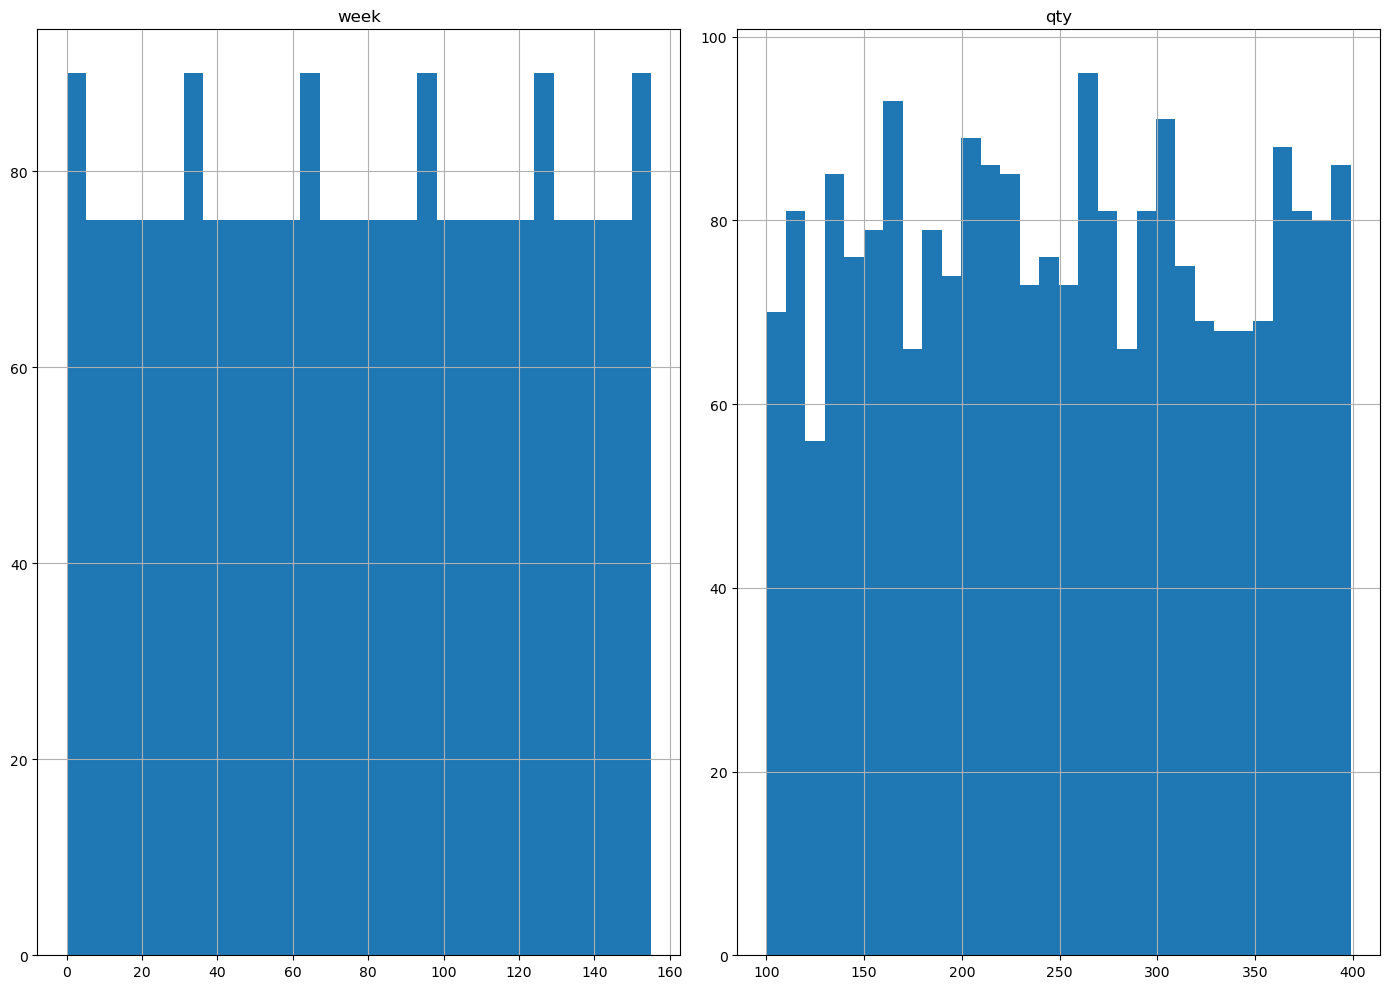

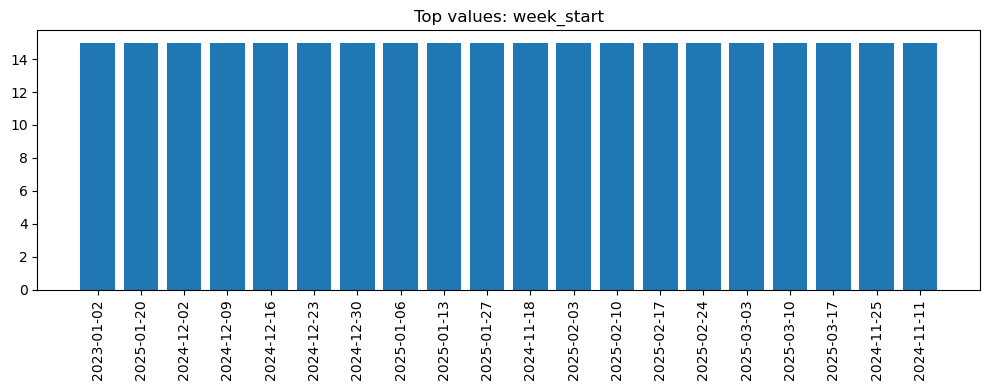

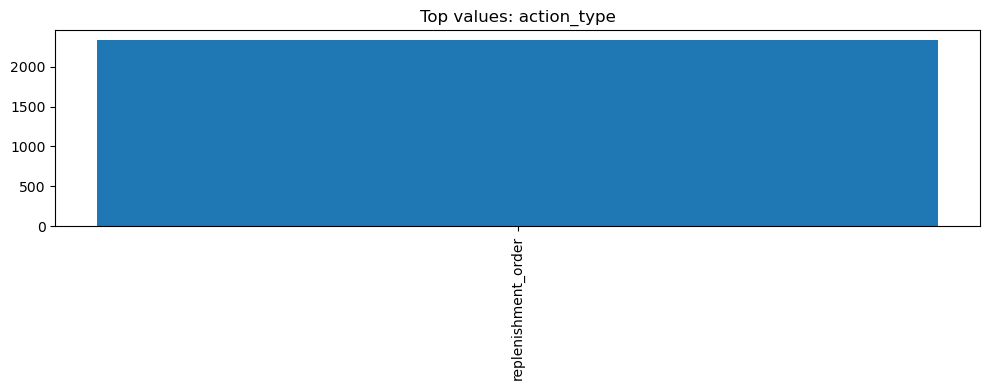

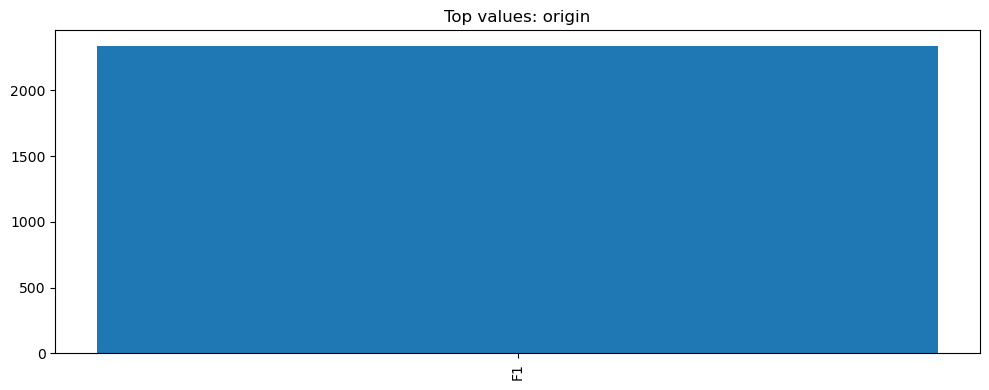

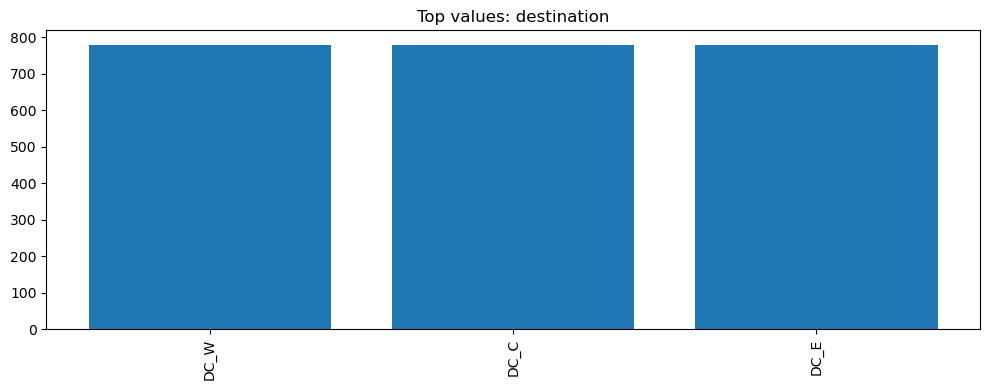

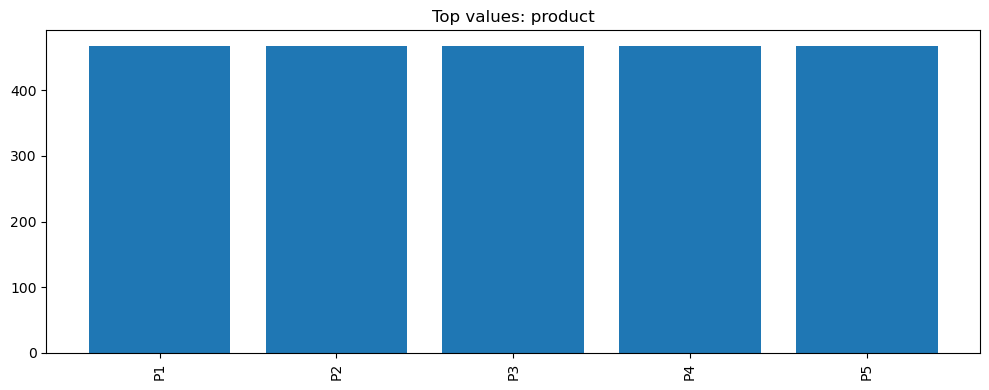

In [17]:
# --- 10) Quick univariate plots ---
# Numeric histograms
if len(num_df.columns) > 0:
    num_df.hist(bins=30, figsize=(14, 10))
    plt.tight_layout()
    plt.show()

# Categorical bar charts (top 20)
for c in cat_cols[:10]:  # cap to avoid noise
    vc = df_actions[c].value_counts(dropna=False).head(20)
    plt.figure(figsize=(10, 4))
    plt.bar(vc.index.astype(str), vc.values)
    plt.xticks(rotation=90)
    plt.title(f"Top values: {c}")
    plt.tight_layout()
    plt.show()

In [18]:
# --- 11) Basic sanity checks (ranges, outliers quick scan) ---
# Percentiles for numerics
if len(num_df.columns) > 0:
    display(num_df.quantile([0, 0.01, 0.05, 0.5, 0.95, 0.99, 1]).T)

# Potential outliers (very rough): values beyond 1st/99th percentile
outlier_summary = []
for c in num_df.columns:
    q01, q99 = num_df[c].quantile([0.01, 0.99])
    outlier_count = ((num_df[c] < q01) | (num_df[c] > q99)).sum()
    outlier_summary.append((c, outlier_count, float(q01), float(q99)))
outlier_summary = pd.DataFrame(outlier_summary, columns=["col", "outliers_1_99pct", "q01", "q99"]).sort_values("outliers_1_99pct", ascending=False)
display(outlier_summary.head(20))

,0.00,0.01,0.05,0.50,0.95,0.99,1.00
week,0.0,1.0,7.00,77.5,148.0,154.0,155.0
qty,100.0,104.0,114.95,250.0,385.0,397.0,399.0


,col,outliers_1_99pct,q01,q99
1,qty,41,104.0,397.0
0,week,30,1.0,154.0


In [19]:
# --- 12) Simple groupby templates (edit these) ---
# Example: df.groupby("some_category")["some_metric"].agg(["count", "mean", "median"]).sort_values("mean", ascending=False)

# If you have a date column:
# df["date_col"] = pd.to_datetime(df["date_col"], errors="coerce")
# df.set_index("date_col").resample("W")["some_metric"].mean().plot()